1. Strona tytułowa
Będziesz mieć standardową stronę tytułową z tytułem projektu, Twoim imieniem, nazwiskiem, datą, uczelnią itp.

2. Podsumowanie (executive summary)
W tym rozdziale krótko przedstawisz cel projektu, główne wyniki oraz wnioski:

Cel: Przewidywanie awarii maszyn na podstawie danych z czujników, co może pomóc w zapobieganiu nieplanowanym przestojom i optymalizacji kosztów konserwacji.
Wyniki: Zbudowanie modelu predykcyjnego, który może przewidzieć awarie maszyn na podstawie parametrów takich jak temperatura, wibracje, ciśnienie itp.
Wnioski: Dzięki wdrożeniu takiego modelu, firma może zmniejszyć koszty utrzymania i zwiększyć dostępność maszyn.
3. Opis organizacji
Opis organizacji, np. fabryki, która używa maszyn w swojej produkcji:

Rodzaj działalności: Produkcja przemysłowa (np. produkcja części samochodowych).
Rodzaj produktów: Produkty wytwarzane przez maszyny, które są kluczowe w procesie produkcji.
Wielkość organizacji: Średniej wielkości firma z kilkoma liniami produkcyjnymi.
Rodzaj rynku: Konkurencja w branży produkcji przemysłowej.
Główni konkurenci: Inne fabryki zajmujące się podobną produkcją.
4. Opis problemu
Decyzja: Jakie czynniki (parametry czujników) wskazują na ryzyko awarii maszyn?
Zbiór decyzji dopuszczalnych: Dane z czujników monitorujących różne parametry maszyn (np. temperatura, wibracje, ciśnienie).
Ocenianie skutków: Zysk z uniknięcia awarii maszyn, zmniejszenie przestojów, zmniejszenie kosztów napraw.
Założenia: Dane z czujników są dokładne, dane o awariach maszyn są dostępne w historycznych zestawach danych.
Dostępne dane: Historyczne dane z czujników (np. z IoT), awarie maszyn (czy i kiedy wystąpiły), dane o konserwacji.
5. Wyniki analizy
Model predykcyjny: Zbudowanie modelu, który przewiduje awarie na podstawie danych z czujników.
Interpretacja wyników: Jaki jest wpływ różnych zmiennych (np. temperatura, wibracje) na przewidywanie awarii.
Czy rozwiązanie jest akceptowalne? Tak, jeśli model może dokładnie przewidzieć awarie na podstawie dostępnych danych.
6. Analiza wrażliwości
W tym rozdziale przeanalizujesz, jak zmiany parametrów wpływają na wyniki modelu:

Zmiana parametrów: Jak zmiana np. temperatury o 5% wpłynie na przewidywanie awarii?
Meta-model: Można stworzyć prosty meta-model, który będzie tłumaczył, dlaczego model predykcyjny wybrał daną decyzję (np. ważność różnych parametrów).
7. Opis procedury uczenia
Modele rozpatrywane: Można rozważyć różne modele predykcyjne, np. regresję logistyczną, drzewa decyzyjne, Random Forest, SVM lub modele głębokiego uczenia (np. sieci neuronowe).
Wybór najlepszego modelu: Wybór modelu na podstawie metryk oceny (np. dokładność, precision, recall).
Dobór parametrów: Jak dobrać odpowiednie parametry do modelu (np. za pomocą GridSearch).
8. Wnioski i zalecenia
Jak wyniki mogą usprawnić działanie organizacji: Dzięki prognozowaniu awarii można zaplanować konserwację prewencyjną, co zmniejszy liczbę awarii i koszty napraw.
9. Bibliografia
Tutaj umieszczasz źródła literaturowe, artykuły, książki oraz dokumentację techniczną, z której korzystałeś.

Dalsze kroki:
Zbieranie danych: Jeśli masz dostęp do rzeczywistych danych z czujników (np. temperatury, wibracji), możesz je wykorzystać. Jeśli nie, możesz stworzyć fikcyjne dane na podstawie typowych parametrów maszyn przemysłowych.
Wybór algorytmu: Dobierz odpowiedni algorytm klasyfikacyjny lub regresyjny (np. SVM, Random Forest, sieci neuronowe).
Weryfikacja modelu: Sprawdź dokładność modelu przy użyciu walidacji krzyżowej i wybierz najlepszy model na podstawie metryk takich jak accuracy, precision, recall.

# Predykcja awarii maszyn

Imię i nazwisko: Kamil Olszewski
Data: 01.12.2024

## Podsumowanie
#### Cel:
Przewidywanie awarii maszyn na podstawie danych z czujników, co może pomóc w zapobieganiu nieplanowanym przestojom i optymalizacji kosztów konserwacji.

#### Wyniki:
Zbudowanie modelu predykcyjnego, który może przewidzieć awarie maszyn na podstawie parametrów takich jak temperatura, wibracje, ciśnienie itp.

#### Wnioski:
Dzięki wdrożeniu takiego modelu, firma może zmniejszyć koszty utrzymania i zwiększyć dostępność maszyn.

### Analiza

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.conftest import index

# Załadowanie danych z pliku CSV
df = pd.read_csv('machine_failure_data_4.csv')

print(f'Plik z danymi został załadowany')

Plik z danymi został załadowany


##### Podstawowa analiza danych

In [6]:
# Informacje o danych
print("Informacje o danych:")
df.info()

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31050 entries, 0 to 31049
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine_ID           31050 non-null  object 
 1   Date                 31050 non-null  object 
 2   Temperature          31050 non-null  float64
 3   Vibration            31050 non-null  float64
 4   Pressure             31050 non-null  float64
 5   RPM                  31050 non-null  float64
 6   Humidity             31050 non-null  float64
 7   Oil_Level            31050 non-null  float64
 8   Oil_Pressure         31050 non-null  float64
 9   Working_Hours        31050 non-null  float64
 10  Ambient_Temperature  31050 non-null  float64
 11  Load                 31050 non-null  float64
 12  Machine_Age          31050 non-null  int64  
 13  Failure              31050 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 3.3+ MB


In [7]:
# Statystyki opisowe
print("\nStatystyki opisowe:")
df.describe()


Statystyki opisowe:


Temperature     Vibration      Pressure           RPM      Humidity  \
count  31050.000000  31050.000000  31050.000000  31050.000000  31050.000000   
mean      75.018292      0.500005    100.077612   1499.130879     50.036852   
std        4.971237      0.100257     10.003512    199.150485      9.984579   
min       55.003339      0.104826     59.964019    699.974124      8.268545   
25%       71.686149      0.432224     93.353049   1364.922401     43.367071   
50%       75.006680      0.500107    100.026939   1499.009105     50.005484   
75%       78.334268      0.567735    106.888936   1633.006753     56.721100   
max       97.921759      0.897687    139.050558   2256.953906     87.987021   

          Oil_Level  Oil_Pressure  Working_Hours  Ambient_Temperature  \
count  31050.000000  31050.000000   31050.000000         31050.000000   
mean      79.962212    199.992448   40213.178468            21.999676   
std       10.042820     14.938867   18480.792950             3.970790   
min       39.459499    137.633992    9175.779982             4.383144   
25%       73.236703    189.904456   25224.485799            19.332502   
50%       79.929094    199.997653   36348.116921            22.032595   
75%       86.661182    210.026482   55361.525884            24.673939   
max      126.167263    259.824468   81791.649081            37.136545   

               Load   Machine_Age       Failure  
count  31050.000000  31050.000000  31050.000000  
mean      70.135570      7.408696      0.104316  
std        9.943388      3.609241      0.305674  
min       31.829909      2.000000      0.000000  
25%       63.452155      5.000000      0.000000  
50%       70.127943      7.000000      0.000000  
75%       76.869262     11.000000      0.000000  
max      113.054900     14.000000      1.000000

In [8]:
# Sprawdzenie brakujących wartości
print("\nBrakujące wartości:")
df.isnull().sum()


Brakujące wartości:


Machine_ID             0
Date                   0
Temperature            0
Vibration              0
Pressure               0
RPM                    0
Humidity               0
Oil_Level              0
Oil_Pressure           0
Working_Hours          0
Ambient_Temperature    0
Load                   0
Machine_Age            0
Failure                0
dtype: int64

In [9]:
# Wyświetlenie pierwszych 10 wierszy danych
print("\nPierwsze 10 wierszy danych:")
df.head(n=10)


Pierwsze 10 wierszy danych:


Machine_ID        Date  Temperature  Vibration    Pressure  \
0  M4000_L01_6390  2022-01-01    65.621616   0.363322  106.363051   
1  M4000_L01_6390  2022-01-02    74.440061   0.621217  112.334968   
2  M4000_L01_6390  2022-01-03    74.247331   0.403444  101.504891   
3  M4000_L01_6390  2022-01-04    86.436130   0.513575  106.080897   
4  M4000_L01_6390  2022-01-05    79.813206   0.479031   92.259571   
5  M4000_L01_6390  2022-01-06    72.466784   0.694512   98.466635   
6  M4000_L01_6390  2022-01-07    70.769915   0.417751  110.867270   
7  M4000_L01_6390  2022-01-08    84.872856   0.715873  112.317784   
8  M4000_L01_6390  2022-01-09    77.562119   0.554349  100.280995   
9  M4000_L01_6390  2022-01-10    78.027416   0.542801   75.303011   

           RPM   Humidity  Oil_Level  Oil_Pressure  Working_Hours  \
0  1318.655866  54.760426  93.036613    203.173805   19263.720546   
1  1185.168943  56.379529  59.555770    216.042213   19276.744820   
2  1477.315750  76.335282  69.749091    188.269283   19289.557065   
3  1640.996262  53.609234  65.330321    213.389442   19302.430826   
4  1428.044371  57.240833  77.442354    212.748818   19316.567184   
5  1318.602555  41.826458  75.168773    191.452575   19328.826753   
6  1700.997376  45.582340  79.158349    218.555241   19342.617886   
7  1457.135103  43.108058  87.278331    190.713960   19356.213183   
8  1260.582587  57.896728  84.314895    183.548716   19369.607847   
9  1596.395828  59.264564  71.624186    210.157791   19382.522047   

   Ambient_Temperature       Load  Machine_Age  Failure  
0            24.388179  61.036648            4        0  
1            18.264949  77.842082            4        1  
2            23.695772  78.727051            4        0  
3            21.578971  60.446536            4        0  
4            16.754703  61.296950            4        0  
5            13.633601  82.637405            4        0  
6            16.294084  73.380227            4        0  
7            23.424639  69.781191            4        0  
8            19.270794  78.875116            4        0  
9            29.489276  73.963739            4        0

##### Wizualizacja danych

In [27]:
# Słownik tłumaczeń
translation_dict = {
    'Temperature': 'Temperatura',
    'Vibration': 'Wibracja',
    'Pressure': 'Ciśnienie',
    'RPM': 'Obroty',
    'Humidity': 'Wilgotność',
    'Oil_Level': 'Poziom Oleju',
    'Oil_Pressure': 'Ciśnienie Oleju',
    'Working_Hours': 'Czas Pracy',
    'Ambient_Temperature': 'Temperatura Otoczenia',
    'Load': 'Obciążenie',
    'Machine_Age': 'Wiek maszyny',
    'Failure': 'Awaria'
}

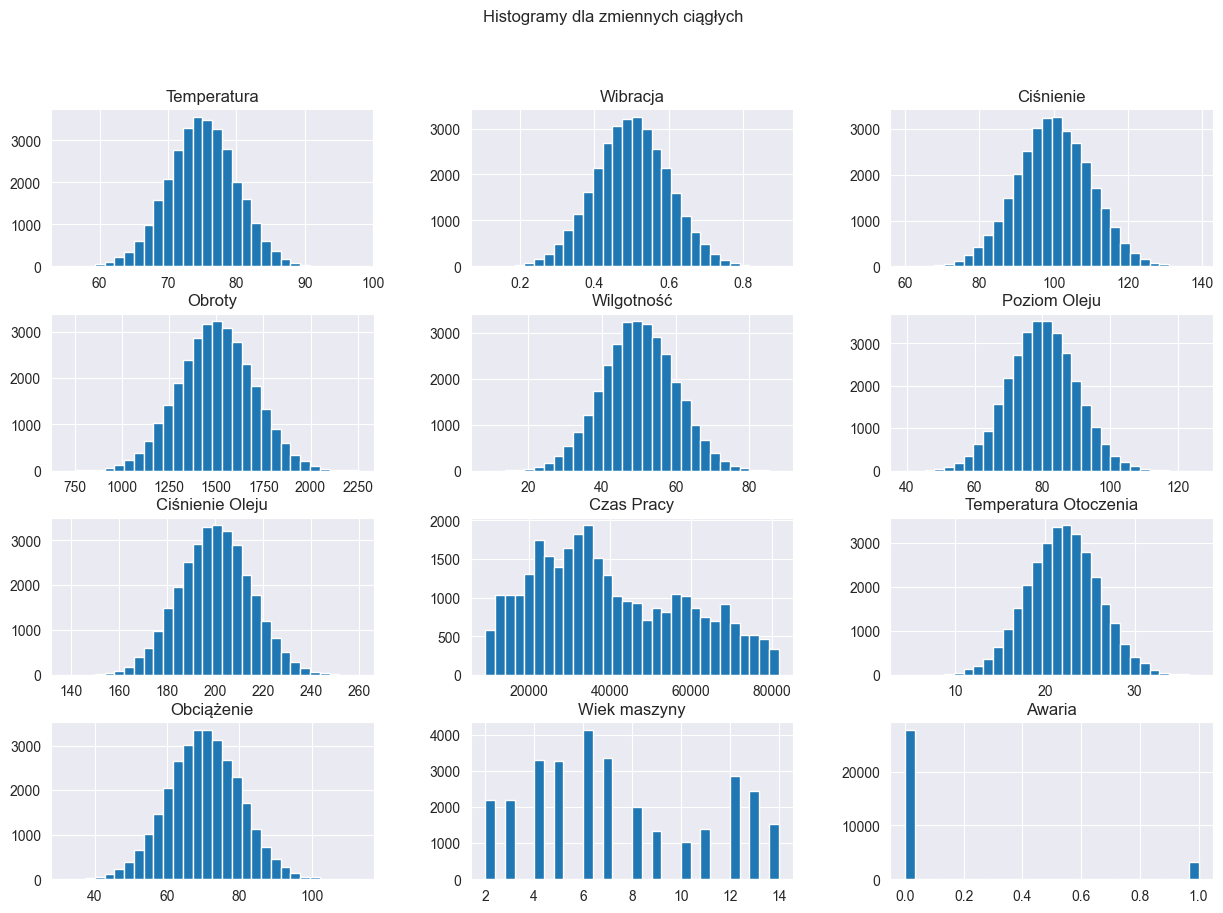

In [33]:
# Histogramy dla zmiennych ciągłych
df = df.rename(columns=translation_dict)

numerical_cols = df.select_dtypes(include=[np.number]).columns

df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramy dla zmiennych ciągłych')
plt.show()

In [34]:
# Wykresy zależności

y = ['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']
x = 'Failure'

for element in y:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=x, y=element)
    plt.title(f'{element} vs {x}')
    plt.show()

ValueError: Could not interpret value `Failure` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

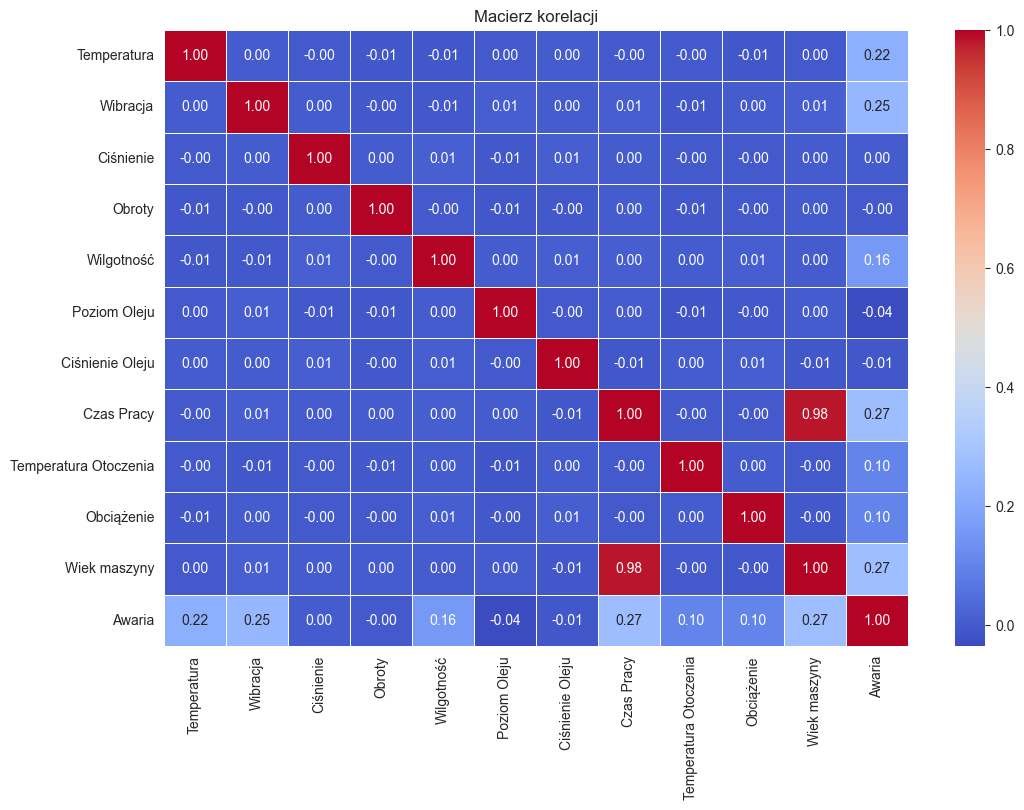

In [35]:
# 5. Macierz korelacji
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()


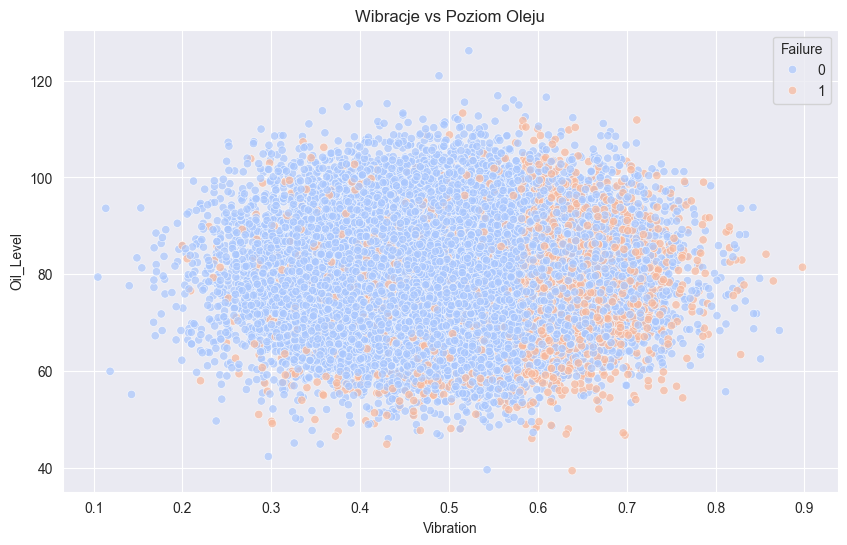

In [21]:
# 6. Dodatkowe wykresy - np. zależność wibracji vs poziom oleju
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vibration', y='Oil_Level', hue='Failure', palette='coolwarm', alpha=0.7)
plt.title('Wibracje vs Poziom Oleju')
plt.show()


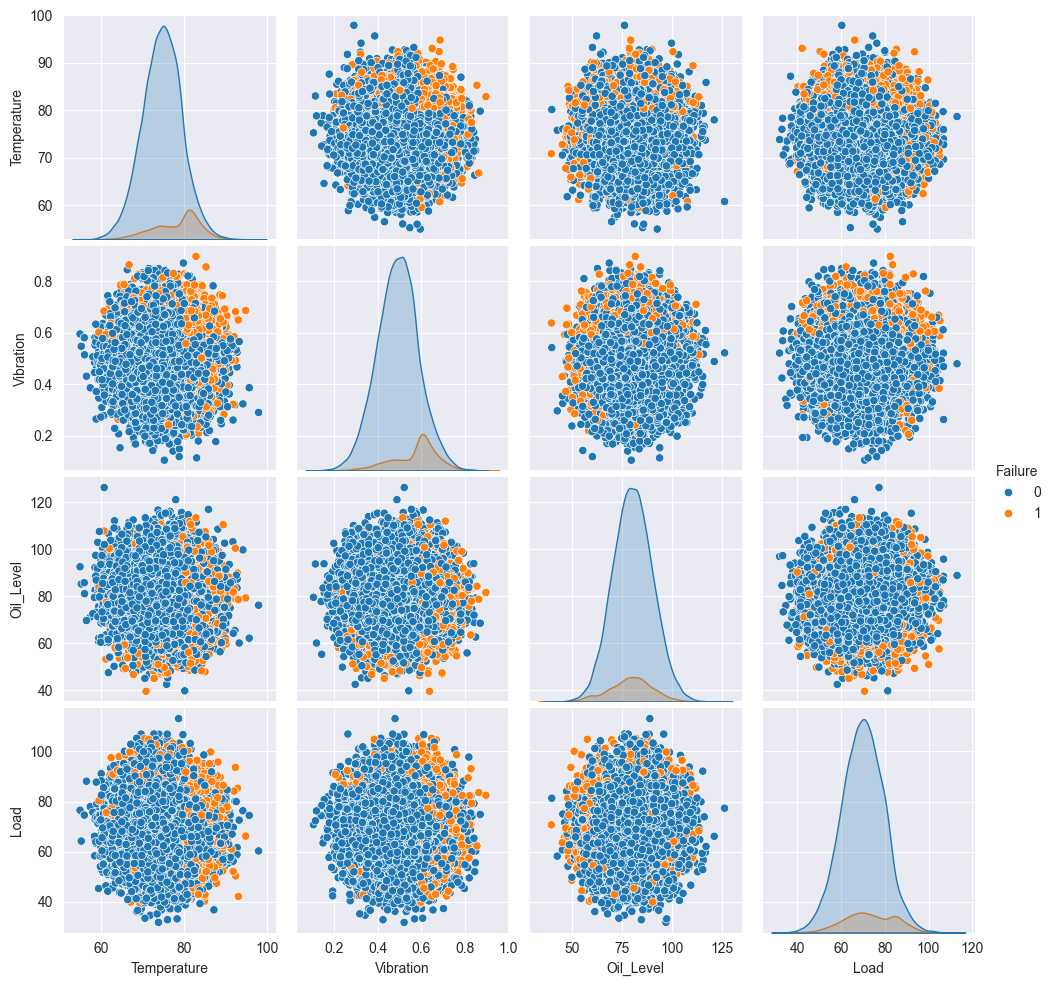

In [22]:
import seaborn as sns

# Wykres par dla wybranych zmiennych
sns.pairplot(df[['Temperature', 'Vibration', 'Oil_Level', 'Load', 'Failure']], hue='Failure')
plt.show()


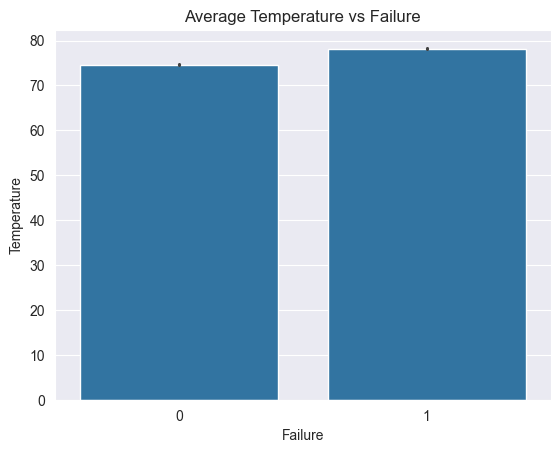

In [23]:
import seaborn as sns

# Wykres słupkowy dla temperatury w zależności od awarii
sns.barplot(x='Failure', y='Temperature', data=df)
plt.title('Average Temperature vs Failure')
plt.show()


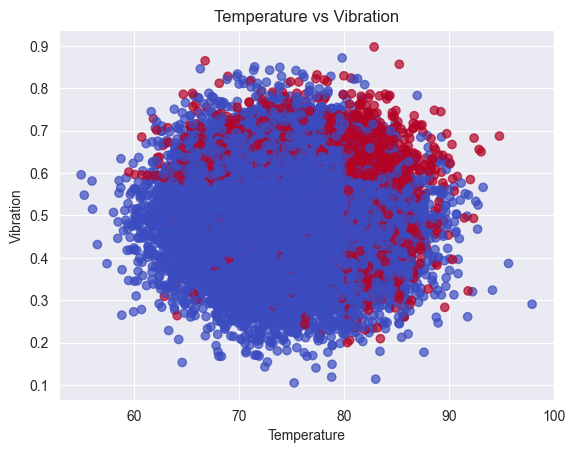

In [24]:
import matplotlib.pyplot as plt

# Wykres rozrzutu dla temperatury i wibracji
plt.scatter(df['Temperature'], df['Vibration'], c=df['Failure'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('Temperature vs Vibration')
plt.show()


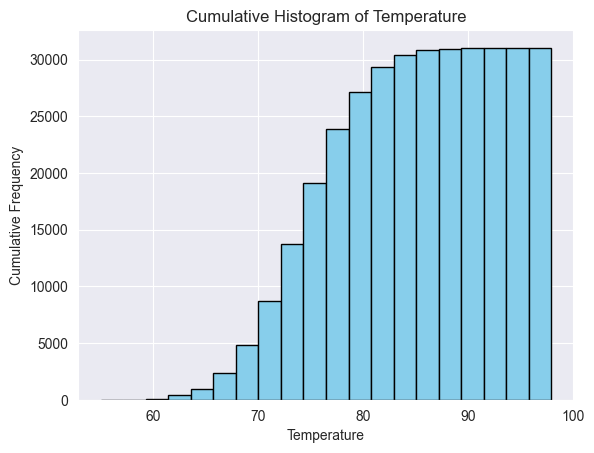

In [25]:
import matplotlib.pyplot as plt

# Wykres histogramu skumulowanego dla temperatury
plt.hist(df['Temperature'], bins=20, cumulative=True, color='skyblue', edgecolor='black')
plt.title('Cumulative Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Cumulative Frequency')
plt.show()


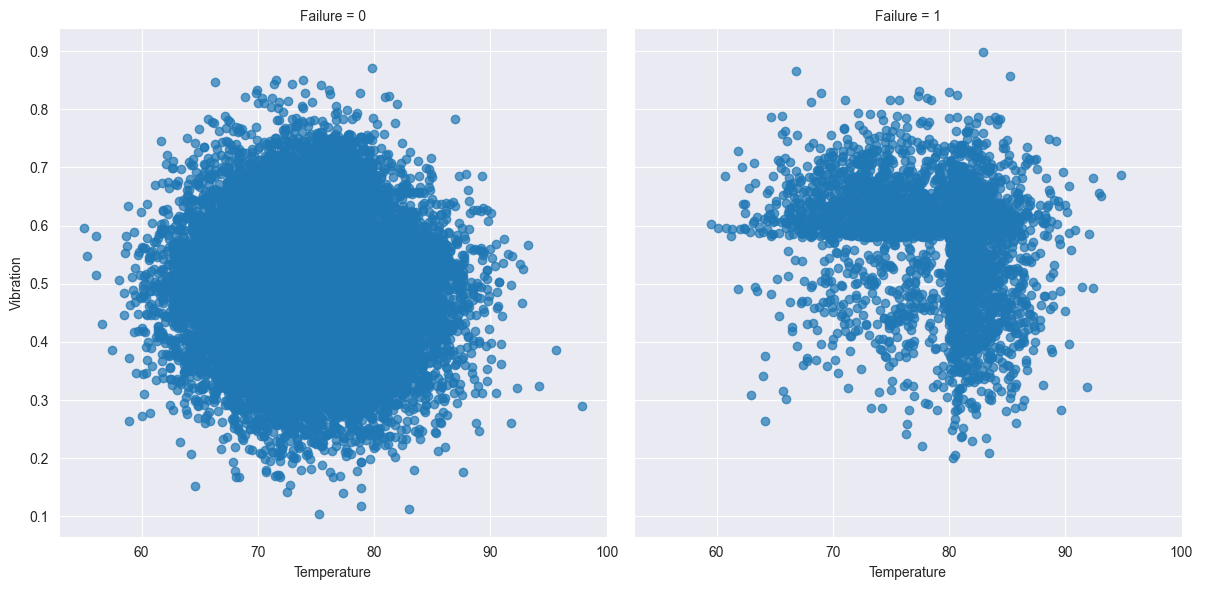

In [26]:
import seaborn as sns

# Facet Grid do porównania temperatury i wibracji w zależności od awarii
g = sns.FacetGrid(df, col="Failure", height=6)
g.map(plt.scatter, "Temperature", "Vibration", alpha=.7)
g.add_legend()
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Wybór zmiennych wejściowych i wyjściowych
X = df[['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']]
y = df['Failure']

# 2. Podział danych na zbiór treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizacja/standaryzacja (jeśli to konieczne)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Definiowanie modeli
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "Gradient Boosting (XGBoost)": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# 5. Trenowanie i ocena modeli
results = {}

for model_name, model in models.items():
    # Trenowanie modelu
    model.fit(X_train_scaled, y_train)

    # Predykcje na zbiorze testowym
    y_pred = model.predict(X_test_scaled)

    # Ocena modelu
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Zapisanie wyników modelu
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": conf_matrix
    }

# 6. Wyświetlenie wyników
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")



Logistic Regression:
Accuracy: 0.9227
Precision: 0.7653
Recall: 0.4227
F1-score: 0.5446
Confusion Matrix:
[[5443   88]
 [ 392  287]]

Random Forest:
Accuracy: 0.9981
Precision: 1.0000
Recall: 0.9823
F1-score: 0.9911
Confusion Matrix:
[[5531    0]
 [  12  667]]

Support Vector Machine (SVM):
Accuracy: 0.9427
Precision: 0.8358
Recall: 0.5920
F1-score: 0.6931
Confusion Matrix:
[[5452   79]
 [ 277  402]]

Gradient Boosting (XGBoost):
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.9897
F1-score: 0.9948
Confusion Matrix:
[[5531    0]
 [   7  672]]

K-Nearest Neighbors (KNN):
Accuracy: 0.9283
Precision: 0.8524
Recall: 0.4168
F1-score: 0.5598
Confusion Matrix:
[[5482   49]
 [ 396  283]]

Decision Tree:
Accuracy: 0.9982
Precision: 1.0000
Recall: 0.9838
F1-score: 0.9918
Confusion Matrix:
[[5531    0]
 [  11  668]]

AdaBoost:
Accuracy: 0.9987
Precision: 0.9985
Recall: 0.9897
F1-score: 0.9941
Confusion Matrix:
[[5530    1]
 [   7  672]]

Naive Bayes:
Accuracy: 0.9151
Precision: 0.6570
Recall: 0.468

Porównanie wyników modeli:
                              Accuracy Precision    Recall  F1-score  \
Logistic Regression           0.922705  0.765333   0.42268  0.544592   
Random Forest                 0.998068       1.0  0.982327  0.991085   
Support Vector Machine (SVM)  0.942673  0.835759  0.592047  0.693103   
Gradient Boosting (XGBoost)   0.998873       1.0  0.989691  0.994819   
K-Nearest Neighbors (KNN)     0.928341   0.85241  0.416789  0.559842   
Decision Tree                 0.998229       1.0    0.9838  0.991834   
AdaBoost                      0.998712  0.998514  0.989691  0.994083   
Naive Bayes                   0.915137  0.657025  0.468336  0.546862   

                                       Confusion Matrix  
Logistic Regression            [[5443, 88], [392, 287]]  
Random Forest                    [[5531, 0], [12, 667]]  
Support Vector Machine (SVM)   [[5452, 79], [277, 402]]  
Gradient Boosting (XGBoost)       [[5531, 0], [7, 672]]  
K-Nearest Neighbors (KNN)      [[5

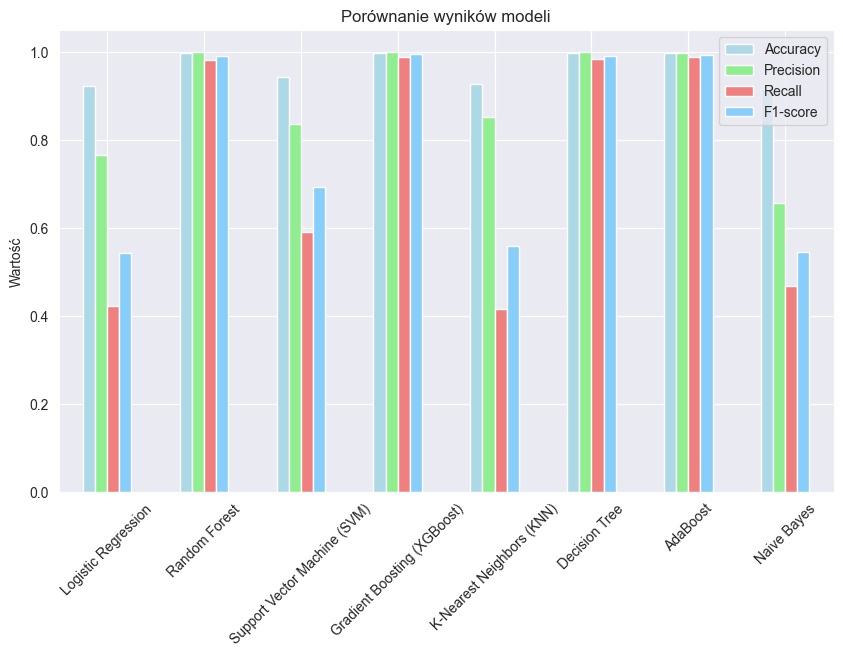

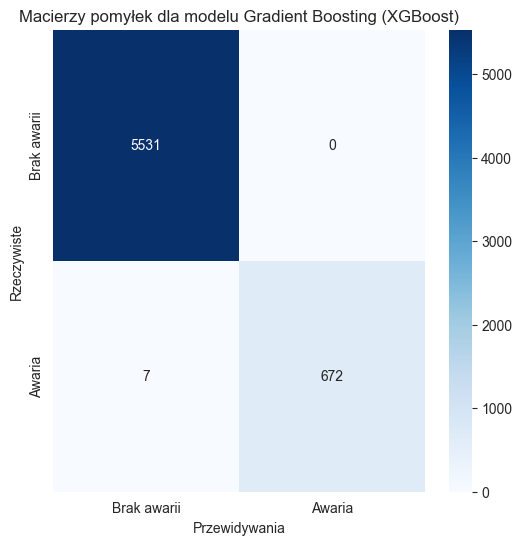


Wskaźniki klasyfikacji dla najlepszego modelu (Gradient Boosting (XGBoost)):
Precision: 1.0000
Recall: 0.9897
F1-score: 0.9948


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Podsumowanie wyników dla każdego modelu
results_df = pd.DataFrame(results).T
print("Porównanie wyników modeli:")
print(results_df)

# 2. Wizualizacja wyników – wykres słupkowy dla metryk
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results_df[metrics].plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Porównanie wyników modeli')
plt.ylabel('Wartość')
plt.xticks(rotation=45)
plt.show()

# Upewnijmy się, że wyniki w results_df są typu numerycznego
results_df = results_df.apply(pd.to_numeric, errors='ignore')

# 3. Analiza macierzy pomyłek (Confusion Matrix) dla najlepszego modelu
best_model_name = results_df['F1-score'].idxmax()  # Wybór modelu z najwyższym F1-score
best_model = models[best_model_name]  # Użycie najlepszego modelu
y_pred_best = best_model.predict(X_test_scaled)

# Generowanie macierzy pomyłek
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Brak awarii', 'Awaria'], yticklabels=['Brak awarii', 'Awaria'])
plt.title(f'Macierzy pomyłek dla modelu {best_model_name}')
plt.xlabel('Przewidywania')
plt.ylabel('Rzeczywiste')
plt.show()

# 4. Wskaźniki klasyfikacji
TP = conf_matrix_best[1, 1]
FP = conf_matrix_best[0, 1]
TN = conf_matrix_best[0, 0]
FN = conf_matrix_best[1, 0]

# Precision, Recall, F1-score z macierzy pomyłek
precision_best = TP / (TP + FP)
recall_best = TP / (TP + FN)
f1_best = 2 * (precision_best * recall_best) / (precision_best + recall_best)

print(f"\nWskaźniki klasyfikacji dla najlepszego modelu ({best_model_name}):")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")



In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

# 1. Wybór zmiennych wejściowych i wyjściowych
X = df[['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']]
y = df['Failure']

# 2. Normalizacja/standaryzacja (jeśli to konieczne)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definiowanie modelu XGBoost
model = XGBClassifier(random_state=42)

# 4. Definiowanie zakresu hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [3, 5, 7],  # Maksymalna głębokość drzewa
    'learning_rate': [0.01, 0.05, 0.1],  # Współczynnik uczenia
    'subsample': [0.7, 0.8, 0.9],  # Proporcja próbek do treningu
    'colsample_bytree': [0.7, 0.8, 0.9],  # Proporcja cech przy budowie drzewa
}

# 5. Tworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1)

# 6. Przeprowadzenie przeszukiwania siatki
grid_search.fit(X_scaled, y)

# 7. Wyniki najlepszych hiperparametrów
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_}")

# 8. Ocena wyników z użyciem cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_scaled, y, cv=5, scoring='f1')
print(f"Cross-validated F1-scores: {cv_scores}")
print(f"Mean F1-score: {cv_scores.mean():.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best F1-score: 0.9904060876773333
Cross-validated F1-scores: [0.98519096 0.98757764 0.99385561 0.99081164 0.99459459]
Mean F1-score: 0.9904


### Zapisanie modelu do pliku

In [5]:
import joblib

# Zapisanie wytrenowanego modelu XGBoost
best_rf_model = grid_search.best_estimator_

# Zapisanie modelu do pliku .pkl
joblib.dump(best_rf_model, 'xgboost_model.pkl')

# Zapisanie skalera 
joblib.dump(scaler, 'scaler.pkl')

print("Model i skaler zostały zapisane do plików.")


Model i skaler zostały zapisane do plików.


## Analiza wrqażliwości

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Załadowanie wytrenowanego modelu
model = joblib.load('xgboost_model.pkl')

# Załadowanie skalera
scaler = joblib.load('scaler.pkl')

# Załóżmy, że masz dane wejściowe (X_train) w formacie DataFrame
X_train = df[['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']]

# Dopasowanie skalera do danych
scaler = StandardScaler()
scaler.fit(X_train)

# Teraz załóżmy, że masz nowe dane wejściowe (np. z czujników) w formacie numpy array
new_data = np.array([[74,0.5,112,1185,56,59,216,19276,18,77,4]])

# Możesz przekształcić nowe dane do formatu DataFrame, aby zachować nazwy cech
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Skalowanie nowych danych
new_data_scaled = scaler.transform(new_data_df)

# Dokonanie predykcji
prediction = model.predict(new_data_scaled)

# Wyświetlenie wyniku
if prediction == 1:
    print("Awaria")
else:
    print("Brak awarii")


Brak awarii


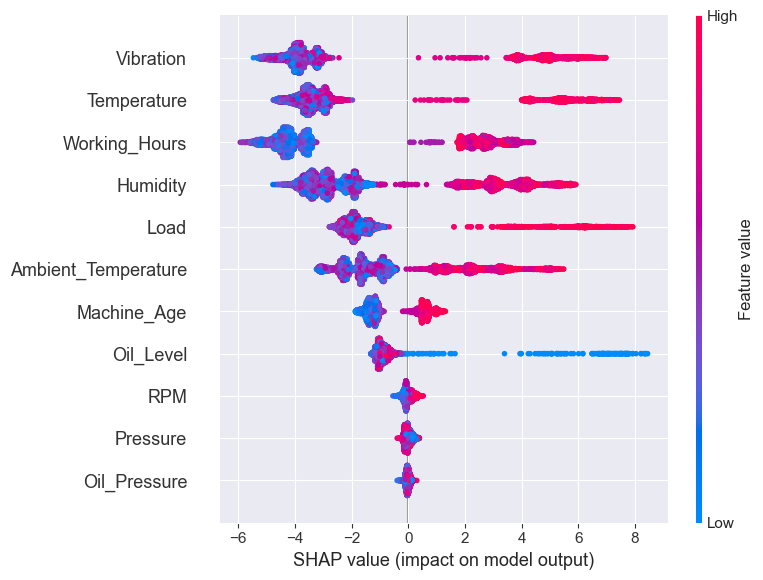

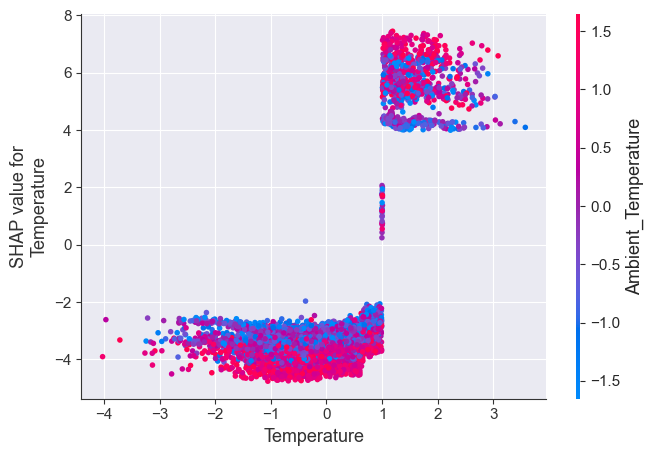

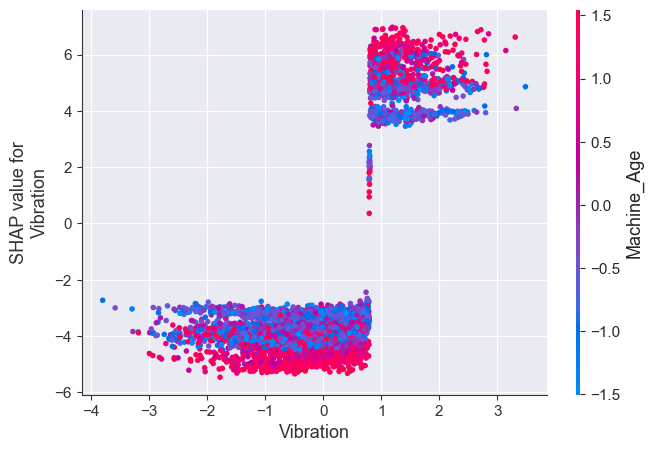

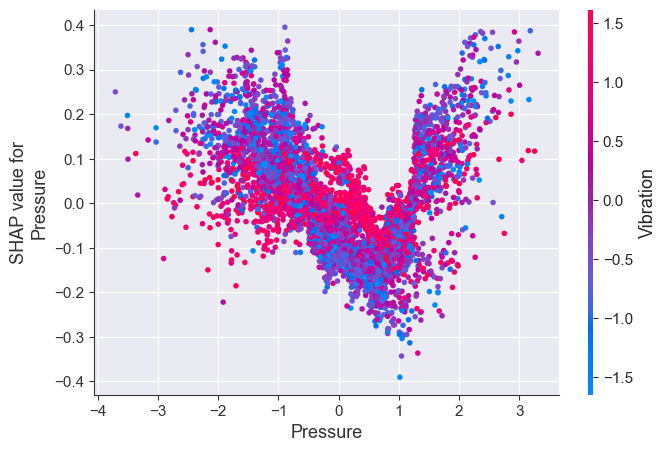

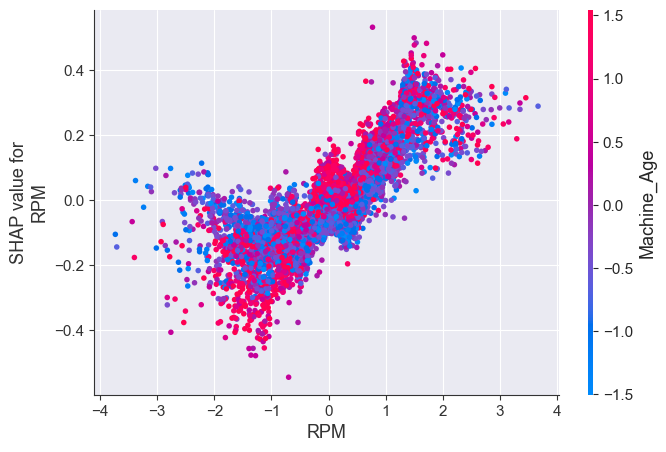

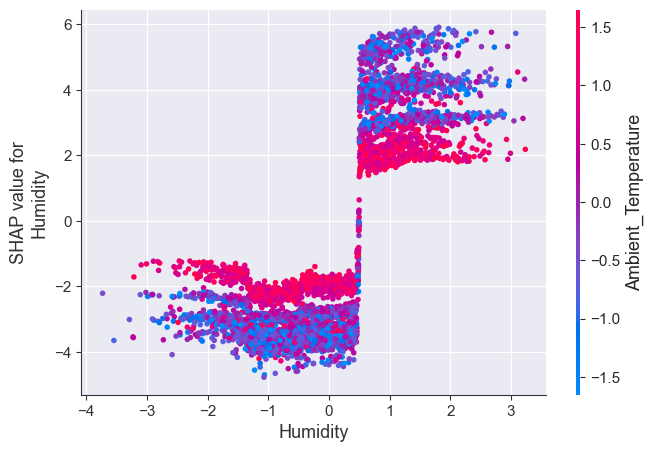

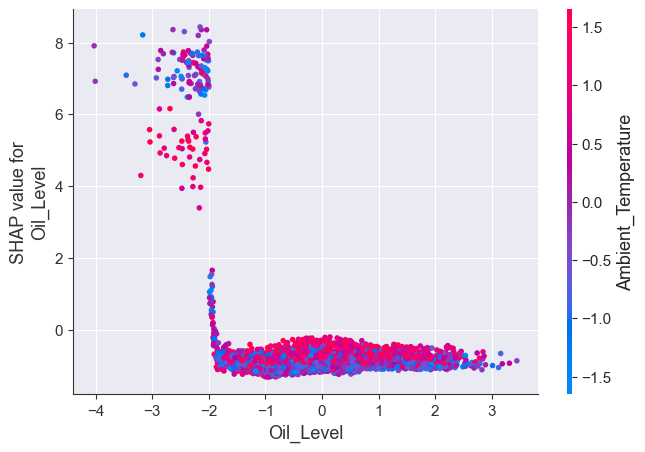

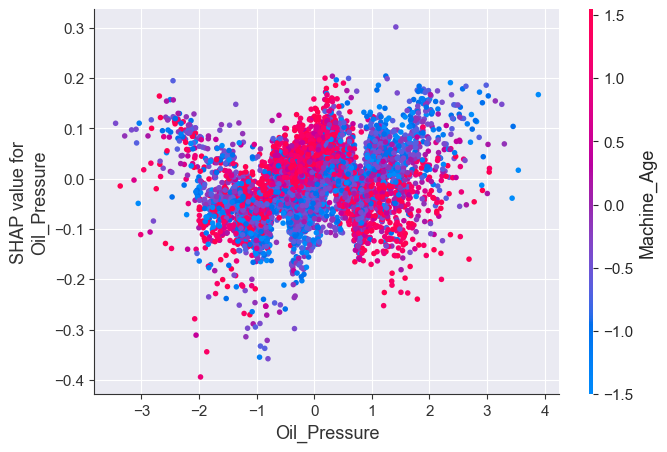

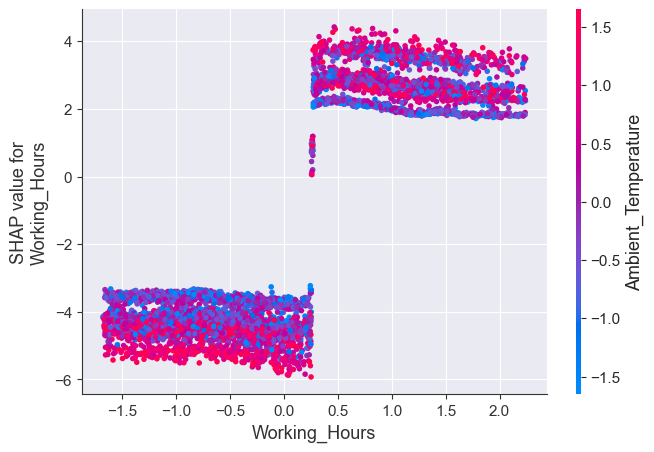

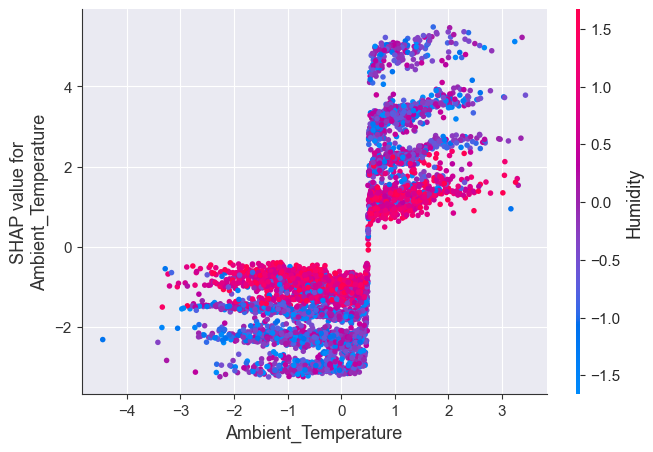

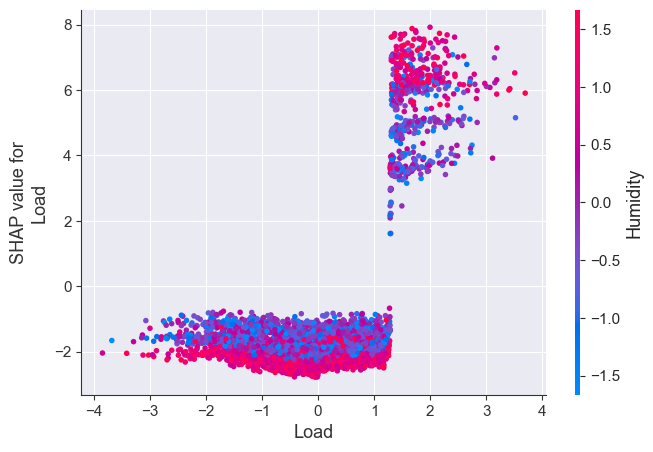

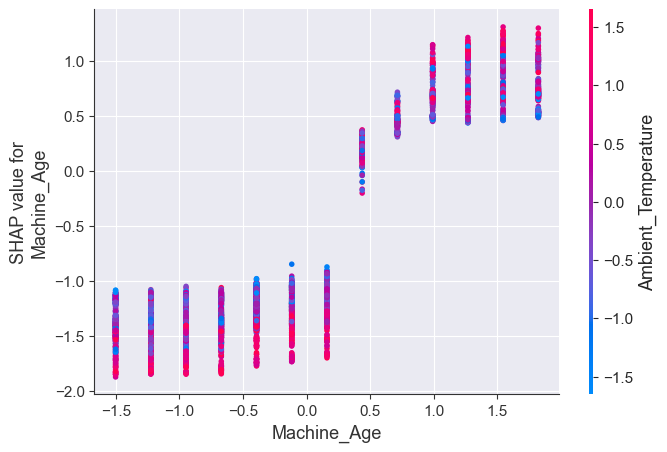

In [39]:
import shap
import matplotlib.pyplot as plt

# Załaduj model, jeśli jeszcze tego nie zrobiłeś
model = joblib.load('xgboost_model.pkl')

# Użycie SHAP do wyjaśnienia modelu
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)  # Przyjmujemy, że X_test_scaled to dane testowe

# Wizualizacja wpływu cech na wynik modelu (summary plot)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Możesz także stworzyć wykres zależności dla jednej cechy (np. Temperature)
# shap.dependence_plot("Temperature", shap_values, X_test_scaled, feature_names=X.columns)

features = ['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']

for element in features:
    shap.dependence_plot(element, shap_values, X_test_scaled, feature_names=X.columns)


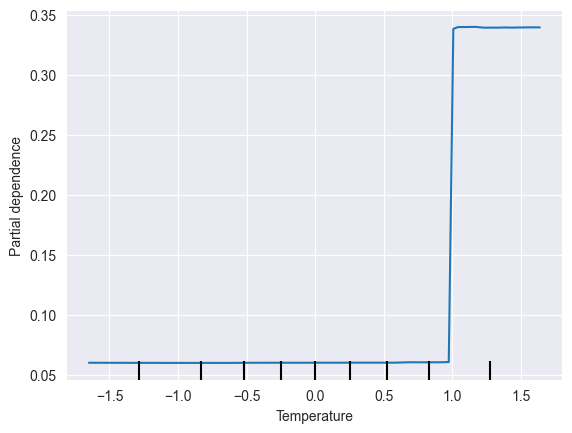

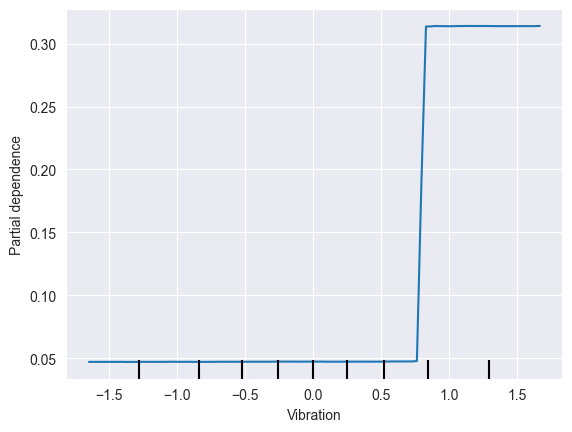

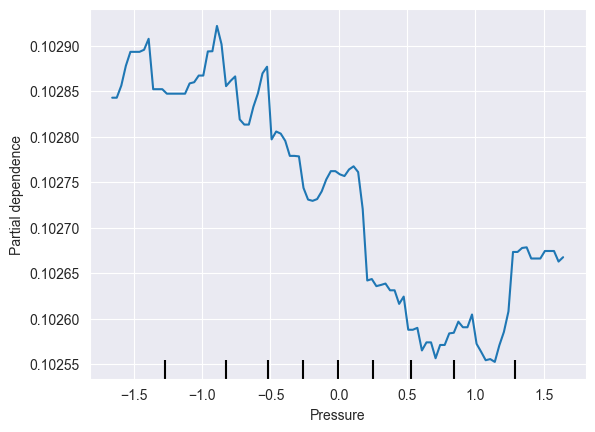

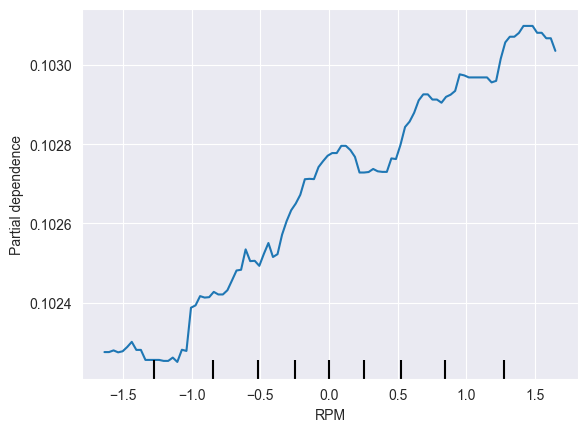

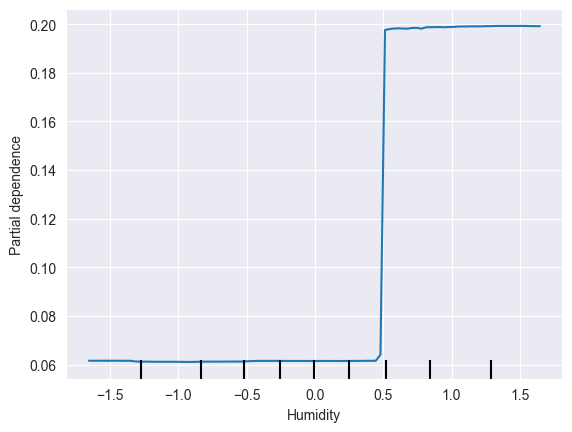

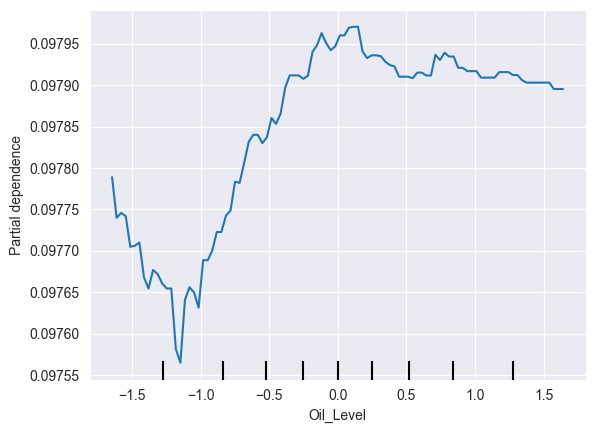

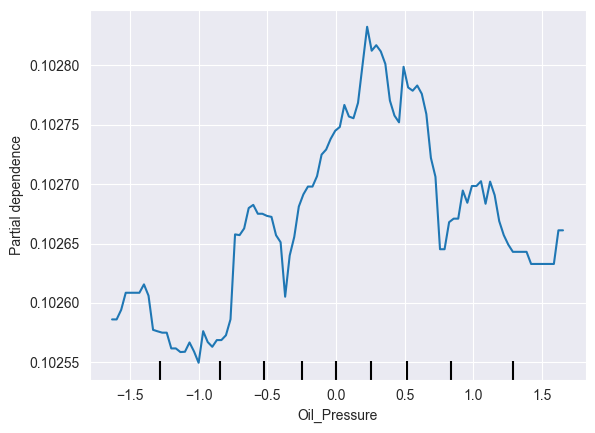

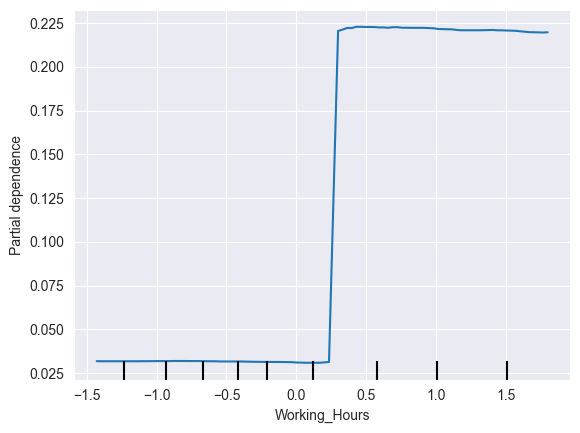

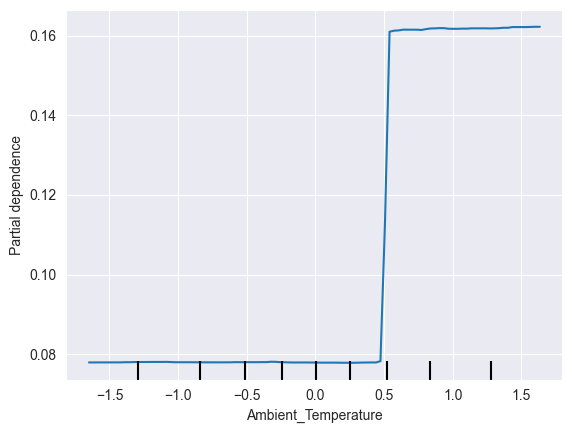

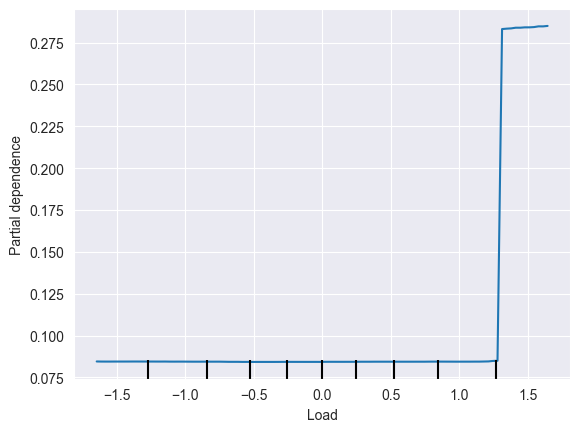

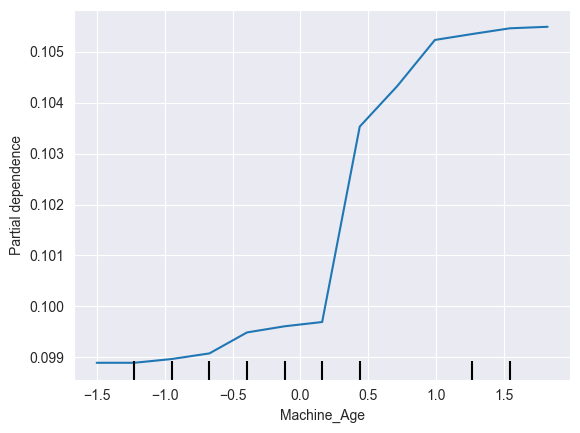

In [38]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Wybierz cechy, dla których chcesz wykonać PDP
features = ['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Working_Hours', 'Ambient_Temperature', 'Load', 'Machine_Age']  

for element in features:
    display = PartialDependenceDisplay.from_estimator(model, X_train_scaled, [element], feature_names=X.columns)
    # display.plot()
